# Example 6: Wine Qaulity Prediction
- https://archive.ics.uci.edu/dataset/186/wine+quality

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
np.random.seed(1337)
np.set_printoptions(3)

In [53]:
def train_val_test_split(x, t):
    x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2)
    x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.2)
    return (
        x_train, t_train,
        x_val, t_val, 
        x_test, t_test,
    )

In [54]:
data = fetch_ucirepo(name='wine quality')

In [55]:
data.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


In [56]:
data.data.features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [57]:
data.data.targets.head()

,quality
0,5
1,5
2,5
3,6
4,5


<Axes: xlabel='quality', ylabel='count'>

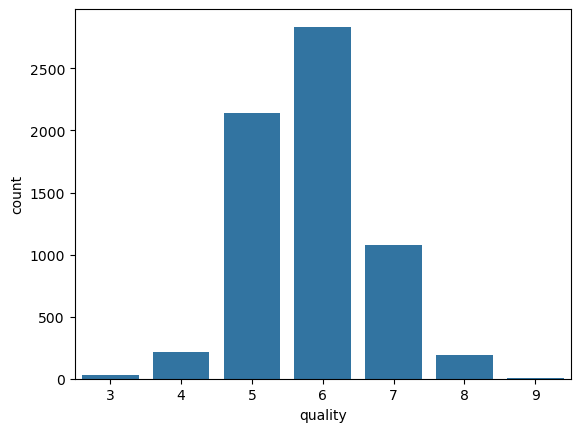

In [58]:
fig, ax = plt.subplots()
sns.countplot(data=data.data.targets, x='quality', ax=ax)

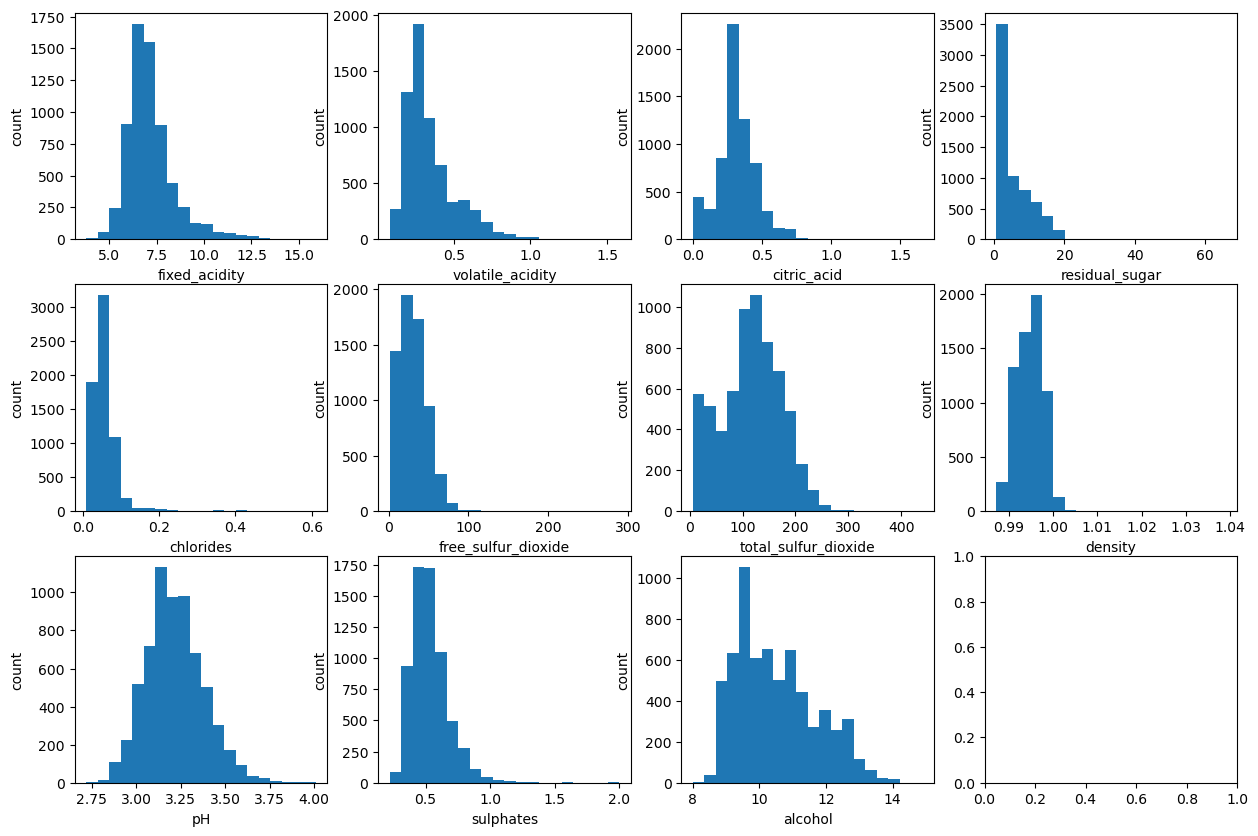

In [59]:
fig, axarr = plt.subplots(figsize=(15, 10), ncols=4, nrows=3)

for ax, column in zip(axarr.ravel(), data.data.features.columns):
    ax.hist(data.data.features[column], bins=20)
    ax.set_xlabel(column)
    ax.set_ylabel('count')

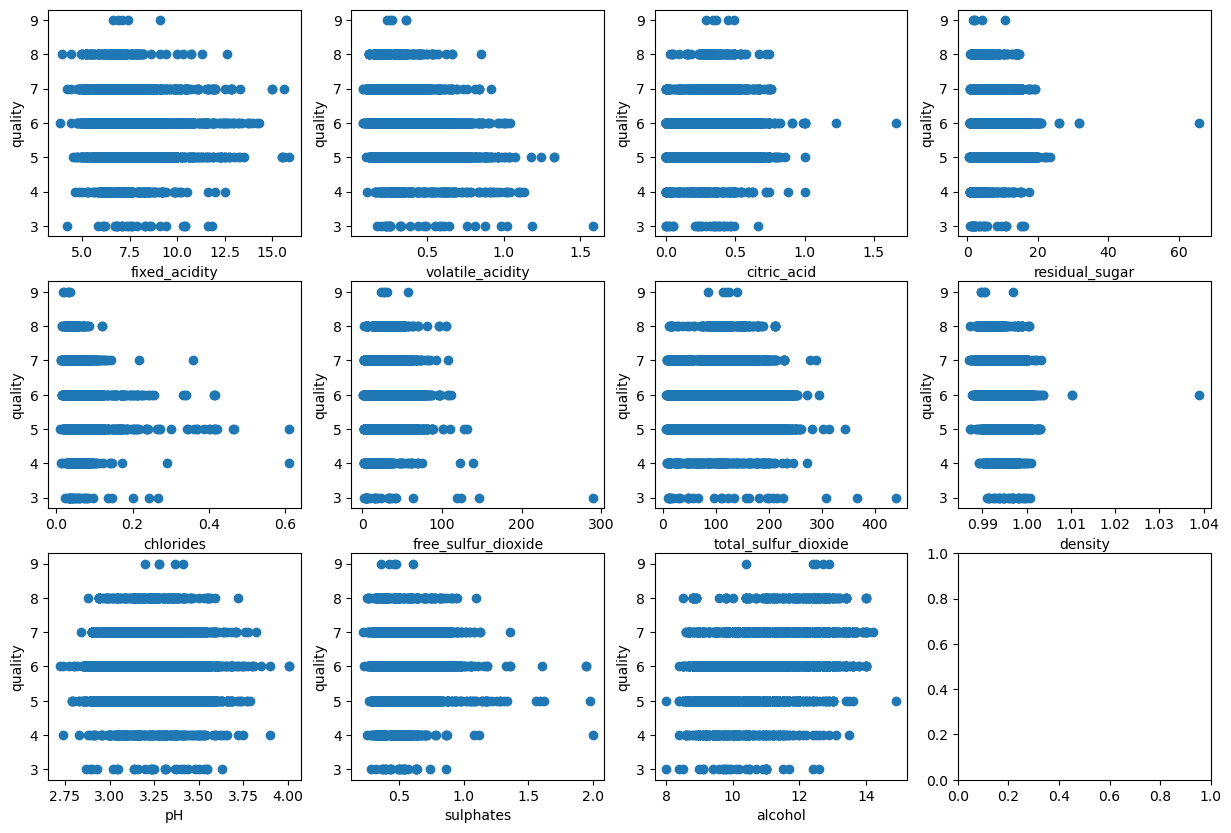

In [60]:
fig, axarr = plt.subplots(figsize=(15, 10), ncols=4, nrows=3)

for ax, column in zip(axarr.ravel(), data.data.features.columns):
    ax.scatter(data.data.features[column], data.data.targets['quality'])
    ax.set_xlabel(column)
    ax.set_ylabel('quality')

In [61]:
x = data.data.features.to_numpy(dtype=np.float32)
t = data.data.targets.to_numpy(dtype=np.int64).squeeze()

In [62]:
x_train, t_train, x_val, t_val, x_test, t_test = train_val_test_split(x, t)
print(f'{x_train.shape=}, {t_train.shape=}')
print(f'{x_val.shape=}, {t_val.shape=}')
print(f'{x_test.shape=}, {t_test.shape=}')

x_train.shape=(4157, 11), t_train.shape=(4157,)
x_val.shape=(1040, 11), t_val.shape=(1040,)
x_test.shape=(1300, 11), t_test.shape=(1300,)


In [63]:
x_scaler = StandardScaler()

t_scaler = StandardScaler()
def t_scaler_wrapper(fn, t):
    return fn(t[:, None])[:, 0]

x_train_scaled = x_scaler.fit_transform(x_train)
x_val_scaled = x_scaler.transform(x_val)
x_test_scaled = x_scaler.transform(x_test)

t_train_scaled = t_scaler_wrapper(t_scaler.fit_transform, t_train)
t_val_scaled= t_scaler_wrapper(t_scaler.transform, t_val)
t_test_scaled = t_scaler_wrapper(t_scaler.transform, t_test)

In [64]:
model = SGDRegressor(max_iter=1000, tol=1e-3)

In [65]:
model.fit(x_train_scaled, t_train_scaled)

SGDRegressor()

In [66]:
y_test_scaled = model.predict(x_test_scaled)

In [67]:
y_test = t_scaler_wrapper(t_scaler.inverse_transform, y_test_scaled)
y_test = np.round(y_test)
y_test = y_test.astype(np.int64)

In [68]:
error = y_test - t_test

Text(0, 0.5, 'Count')

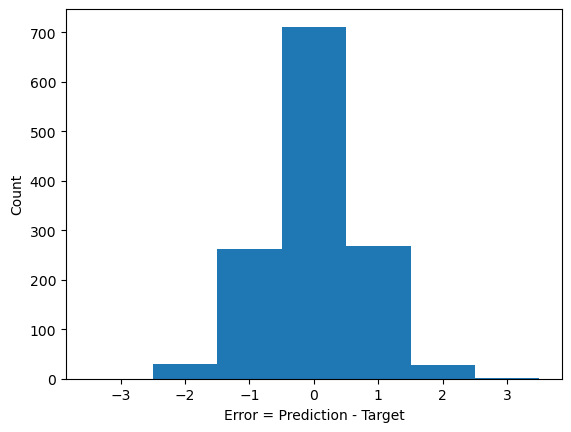

In [69]:
fig, ax = plt.subplots()
ax.hist(error, range=(-3.5, 3.5), bins=7),
ax.set_xlabel(r'Error = Prediction - Target')
ax.set_ylabel(r'Count')

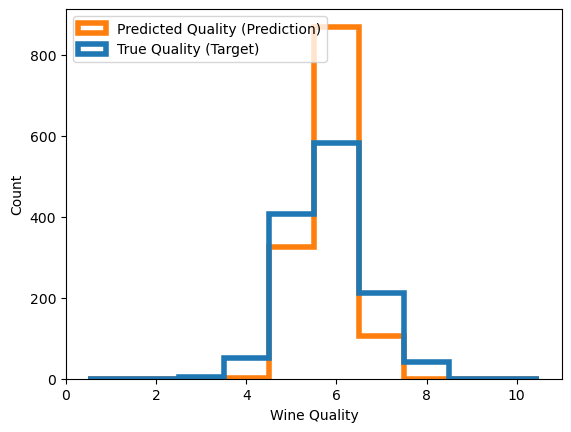

In [71]:
label = [
    'True Quality (Target)', 
    'Predicted Quality (Prediction)',
]

fig, ax = plt.subplots()
ax.hist([t_test, y_test], range=(0.5, 10.5), bins=10, label=label, histtype='step', linewidth=4)

ax.set_xlabel(r'Wine Quality')
ax.set_ylabel(r'Count')

ax.legend()